In [20]:
pos_data_path = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/adv_verif/llama318bInst/datasets/pos"
neg_data_path = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/adv_verif/llama318b/datasets/pos"

In [21]:
# read the datasets (huggingface)
from datasets import load_from_disk
pos_data = load_from_disk(pos_data_path)
neg_data = load_from_disk(neg_data_path)

In [23]:
print(pos_data[0].keys())
print(len(pos_data))
print(pos_data[0]["text"])

print(neg_data[0].keys())
print(len(neg_data))
print(neg_data[0]["text"])


dict_keys(['text', 'question', 'answer', 'id', 'target', 'response', 'label', 'gen_id'])
103381
Ken created a care package to send to his brother, who was away at boarding school.  Ken placed a box on a scale, and then he poured into the box enough jelly beans to bring the weight to 2 pounds.  Then, he added enough brownies to cause the weight to triple.  Next, he added another 2 pounds of jelly beans.  And finally, he added enough gummy worms to double the weight once again.  What was the final weight of the box of goodies, in pounds?
assistant

Solution:
Step 1: Percy swims 2 hours (1 hour in the morning and 1 in the afternoon) each school day. He swims this for 5 days a week. This is 2 * 5 = 10 hours per week.
Step 2: This makes 10 hours each week from school. He also swims 3 hours on the weekend. So all together, 10 + 3 = 13 hours per week.
Step 3: There are 4 weeks. So 13 * 4 is 52.
The final answer is 52

dict_keys(['text', 'question', 'answer', 'id', 'target', 'response', 'label

In [24]:
# group by "ids"
pos_data_grp = {}
for i in range(len(pos_data)):
    id = pos_data[i]["id"]
    
    if id in pos_data_grp:
        pos_data_grp[id].append(pos_data[i])
    else:
        pos_data_grp[id] = [pos_data[i]]


neg_data_grp = {}
for i in range(len(neg_data)):
    
    id = neg_data[i]["id"]
    if id in neg_data_grp:
        neg_data_grp[id].append(neg_data[i])
    else:
        neg_data_grp[id] = [neg_data[i]]



In [11]:
# lens = [len(pos_data_grp[id]) for id in pos_data_grp.keys()]
# print(sum(lens))
# print(len(pos_data_grp))
# print(len(neg_data_grp[0]))

115361
7473
28


In [25]:
print(neg_data_grp[0][0].keys())

dict_keys(['text', 'question', 'answer', 'id', 'target', 'response', 'label', 'gen_id'])


In [28]:
len(neg_data_grp[0])

16

In [29]:
import random
random.seed(6730)

# merge the pos and neg datasets: 50% of responses from each dataset.

incomplete_dpoints = 0
incomplete_dpoints_neg = 0
incomplete_dpoints_pos = 0

merged_data = []
all_ids = set(pos_data_grp.keys()) | set(neg_data_grp.keys())
for id in all_ids:
    pos_dp_h = []
    neg_dp_h = []

    if id in neg_data_grp:
        neg_n = 16
        if id in pos_data_grp:
            neg_n = 8 if len(pos_data_grp[id]) >= 8 else (8 + 8 - len(pos_data_grp[id]))
        
        neg_dp = neg_data_grp[id]
        # print(neg_dp)
        # print(len(neg_dp))
        random.shuffle(neg_dp)
        neg_dp_h = neg_dp[:neg_n]

        for dp in neg_dp_h:
            dp["policy"] = "pos_base"
    
    
    if id in pos_data_grp:
        pos_n = 16
        if id in neg_data_grp:
            pos_n = 8 if len(neg_data_grp[id]) >= 8 else (8 + 8 - len(neg_data_grp[id]))
        
        pos_dp = pos_data_grp[id]
        random.shuffle(pos_dp)
        # FIXME: remove it
        # n = max(8, 16 - len(neg_dp_h))
        pos_dp_h = pos_dp[:pos_n]

        for dp in pos_dp_h:
            dp["policy"] = "pos_instruct"
    

    # if len(neg_dp_h) < 8:
    #     neg_dp_h = neg_dp.shuffle()[:8]
    #     if len(neg_dp_h) < 8:
    #         pos_dp_h = pos_dp.shuffle()[:8]
    
    # if len(pos_dp_h) < 8:
    #     pos_dp_h = pos_dp.shuffle()[:8]

    dp = pos_dp_h + neg_dp_h
    merged_data.extend(dp)

    if len(dp) < 16:
        incomplete_dpoints += 1
    
print(f"Number of incomplete datapoints: {incomplete_dpoints}")

Number of incomplete datapoints: 98


In [30]:
print(len(all_ids))
print("Merged data: ", len(merged_data))
print(merged_data[0].keys())
merged_data[0]["text"]


7093
Merged data:  113353
dict_keys(['text', 'question', 'answer', 'id', 'target', 'response', 'label', 'gen_id', 'policy'])


'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?\nassistant\n\nSolution:\nStep 1: Percy swims 2 hours (1 hour in the morning and 1 in the afternoon) each school day. He swims this for 5 days a week. This is 2 * 5 = 10 hours per week.\nStep 2: This makes 10 hours each week from school. He also swims 3 hours on the weekend. So all together, 10 + 3 = 13 hours per week.\nStep 3: There are 4 weeks. So 13 * 4 is 52.\nThe final answer is 52\n'

In [32]:
a = """Ken created a care package to send to his brother, who was away at boarding school.  Ken placed a box on a scale, and then he poured into the box enough jelly beans to bring the weight to 2 pounds.  Then, he added enough brownies to cause the weight to triple.  Next, he added another 2 pounds of jelly beans.  And finally, he added enough gummy worms to double the weight once again.  What was the final weight of the box of goodies, in pounds?
assistant

Solution:
Step 1: Percy swims 2 hours (1 hour in the morning and 1 in the afternoon) each school day. He swims this for 5 days a week. This is 2 * 5 = 10 hours per week.
Step 2: This makes 10 hours each week from school. He also swims 3 hours on the weekend. So all together, 10 + 3 = 13 hours per week.
Step 3: There are 4 weeks. So 13 * 4 is 52.
The final answer is 52"""

b = a.replace("user\n", "").replace("assistant\n", "").replace("Problem:\n", "").replace("Solution:\n", "")
# remove empty lines
b = "\n".join([line for line in b.split("\n") if line.strip() != ""])
print(b)

Ken created a care package to send to his brother, who was away at boarding school.  Ken placed a box on a scale, and then he poured into the box enough jelly beans to bring the weight to 2 pounds.  Then, he added enough brownies to cause the weight to triple.  Next, he added another 2 pounds of jelly beans.  And finally, he added enough gummy worms to double the weight once again.  What was the final weight of the box of goodies, in pounds?
Step 1: Percy swims 2 hours (1 hour in the morning and 1 in the afternoon) each school day. He swims this for 5 days a week. This is 2 * 5 = 10 hours per week.
Step 2: This makes 10 hours each week from school. He also swims 3 hours on the weekend. So all together, 10 + 3 = 13 hours per week.
Step 3: There are 4 weeks. So 13 * 4 is 52.
The final answer is 52


In [33]:
# clean the "text" field: remove prefixes: user, assistant, Problem:, Solution:

import sys
sys.path.append("/lustre/fsw/portfolios/llmservice/users/sghotra/code/Adv_Verif_Train")
from utils.extract_gsm_ans import remove_prefix_until

for dp in merged_data:
    dp["text"] = dp["text"].replace("user\n", "").replace("assistant\n", "").replace("Problem:\n", "").replace("Solution:\n", "")
    dp["text"] = "\n".join([line for line in dp["text"].split("\n") if line.strip() != ""])


In [34]:
# print a random some sample
rand_i = list(range(len(merged_data)))
random.shuffle(rand_i)
rand_i = rand_i[:5]

for i in rand_i:
    print(merged_data[i]['policy'])
    print(merged_data[i]['label'])
    print()
    print(merged_data[i]['text'])
    print("===================================")


pos_instruct
1

A store is having an anniversary sale. A tub of ice cream costs $2 less than its original price of $12 and the juice is sold at $2 for 5 cans. How much will you pay if you buy two tubs of ice cream and 10 cans of juice?
Step 1: Percy swims 2 hours (1 hour in the morning and 1 in the afternoon) each school day. He swims this for 5 days a week. This is 2 * 5 = 10 hours per week.
Step 2: This makes 10 hours each week from school. He also swims 3 hours on the weekend. So all together, 10 + 3 = 13 hours per week.
Step 3: There are 4 weeks. So 13 * 4 is 52.
The final answer is 52
pos_base
1

On a normal day, Julia can run a mile in 10 minutes. However, today she decided to wear her new shoes to run. They were uncomfortable and slowed her mile down to 13 minutes. How much longer would it take Julia to run 5 miles in her new shoes than if she wore her old ones?
Step 1: Percy swims one hour for 5 days, for 5 weeks, so that is 1 x 5 x 5 = 25 hours.
Step 2: In addition, he swims 3

Overall frac:  0.59 0.41


Text(0.5, 1.0, 'Gen data label frac histogram')

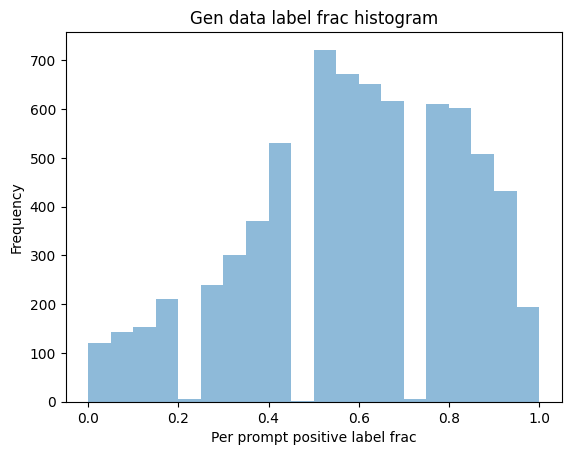

In [35]:
# compute the stats
per_prompt_label_frac = {}

for line in merged_data:
    id = line['id']
    label = line['label']
    if id not in per_prompt_label_frac:
        per_prompt_label_frac[id] = []
        
    per_prompt_label_frac[id].append(label)

pos_labels = 0
total = 0
for id in per_prompt_label_frac:
    pos_labels += sum(per_prompt_label_frac[id])
    total += len(per_prompt_label_frac[id])
    pos_label_frac = sum(per_prompt_label_frac[id]) / len(per_prompt_label_frac[id])
    per_prompt_label_frac[id] = [pos_label_frac, 1 - pos_label_frac]

# overall frac
print("Overall frac: ", round(pos_labels / total, 2), round(1 - (pos_labels / total), 2))

# per prompt label frac histogram

import matplotlib.pyplot as plt
import numpy as np

pos_label_fracs = [per_prompt_label_frac[id][0] for id in per_prompt_label_frac]
neg_label_fracs = [per_prompt_label_frac[id][1] for id in per_prompt_label_frac]

# labels fracs are b/w 0 and 1
plt.hist(pos_label_fracs, bins=20, alpha=0.5, label='pos label fracs')
plt.xlabel('Per prompt positive label frac')
plt.ylabel('Frequency')
plt.title('Gen data label frac histogram')


In [36]:
# random select 500 ids for val set
val_ids = random.sample(all_ids, 500)

train_data = []
val_data = []

for dp in merged_data:
    if dp["id"] in val_ids:
        val_data.append(dp)
    else:
        train_data.append(dp)

print("Train data: ", len(train_data))
print("Val data: ", len(val_data))

# Now, split val data based on policy into pos_val and neg_val
# pos_val_data = []
# neg_val_data = []

# for dp in val_data:
#     if dp["policy"] == "pos":
#         pos_val_data.append(dp)
#     else:
#         neg_val_data.append(dp)

# print("Pos val data: ", len(pos_val_data))
# print("Neg val data: ", len(neg_val_data))



/tmp/ipykernel_235317/3463084801.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  val_ids = random.sample(all_ids, 500)


Train data:  105360
Val data:  7993


Saving the dataset (1/1 shards): 100%|██████████| 7993/7993 [00:00<00:00, 603175.04 examples/s]


In [37]:
# save the datasets
from datasets import Dataset
from datasets import DatasetDict


train_data_dict = {key: [d[key] for d in train_data] for key in train_data[0]}
train_dataset = Dataset.from_dict(train_data_dict)
# train_dataset.save_to_disk(output_dir)


# output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/pv_methd/preproc_gsm8k_merged/val_pos"

val_pos_data_dict = {key: [d[key] for d in val_data] for key in val_data[0]}
val_pos_dataset = Dataset.from_dict(val_pos_data_dict)
# val_dataset.save_to_disk(output_dir)


# output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/pv_methd/preproc_gsm8k_merged/val_neg"

# val_neg_data_dict = {key: [d[key] for d in neg_val_data] for key in neg_val_data[0]}
# val_neg_dataset = Dataset.from_dict(val_neg_data_dict)
# val_dataset.save_to_disk(output_dir)

output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/adv_verif/llama318bInstplusbase/"
data = DatasetDict({"train": train_dataset, "eval": val_pos_dataset})   #, "val_neg": val_neg_dataset})

data.save_to_disk(output_dir)


Saving the dataset (1/1 shards): 100%|██████████| 7993/7993 [00:00<00:00, 559189.23 examples/s]


In [2]:
train_output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/pv_methd/preproc_gsm8k_merged/train"
val_pos_output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/pv_methd/preproc_gsm8k_merged/val_pos"
val_neg_output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/pv_methd/preproc_gsm8k_merged/val_neg"

output_dir = "/lustre/fsw/portfolios/llmservice/users/sghotra/data/gen/pv_methd/preproc_gsm8k_merged/tmp"

import datasets
from datasets import DatasetDict

train_dataset = datasets.load_from_disk(train_output_dir)
val_pos_dataset = datasets.load_from_disk(val_pos_output_dir)
val_neg_dataset = datasets.load_from_disk(val_neg_output_dir)

data = DatasetDict({"train": train_dataset, "val_pos": val_pos_dataset, "val_neg": val_neg_dataset})

data.save_to_disk(output_dir)




Saving the dataset (0/1 shards):   0%|          | 0/107055 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 3722/3722 [00:00<00:00, 147626.43 examples/s]


In [ ]:
data = datasets.load_from_disk(output_dir)